### Obj: Implement logistic regression from scratch using iris dataset

This notebook is a part of the series __From Scratch__, where i try to code machine learning algorithms from scratch (just numpy and math)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from sklearn.linear_model import LogisticRegression  # Used for validation of the scratch model

### The Dataset
We are going to fit a logistic regression to predict Diagnosis using texture_mean and radius_mean.

In [2]:
df = pd.read_csv("./datasets/bdiag.csv")[["diagnosis", "texture_mean", "radius_mean"]]
df["diagnosis"] = df["diagnosis"].replace({"M":1, "B":0})
df

,diagnosis,texture_mean,radius_mean
0,1,10.38,17.99
1,1,17.77,20.57
2,1,21.25,19.69
3,1,20.38,11.42
4,1,14.34,20.29
...,...,...,...
564,1,22.39,21.56
565,1,28.25,20.13
566,1,28.08,16.60
567,1,29.33,20.60


### Generalized Linear Model

Essentially an extension of linear model, wherein the response variable need not be normally distributed. In logistic regression, the response variable is bernoulli distributed and the assumed link function is the logit, the inverse of which is the sigmoid.

### Maximum Likelihood Estimation for Bernoulli Distribution to derive binary cross entropy

The cost function is called cross-entropy, more specifically log cost. It can be obtained through MLE, i.e. maximizing the likelihood function.

$$L(x_{i}; p) = p^{x_{i}}(1-p)^{1-x_{i}}$$ 

Applying log to both sides (it can be done due to the monotonic nature of log)

$$\log(L(x_{i}; p)) = x_{i}\log{p}+(1-x_{i})\log(1-p)$$

Adding the negative sign to change the purpose from maximizing to minimizing, adding all obtained loss across example, and multiplying by $\frac{1}{n}$ to obtain the average loss.

$$\textrm{cross-entropy binary cost function}= -\frac{1}{n}\sum_{i=0}^{n}x_{i}\log{p}+(1-x_{i})\log(1-p)$$



### Cost function for logistic regression

In logistic regression, the $p$ parameter is assumed to be obtained through the sigmoid of linear combination of input features. The response variable is now denoted as $y$

$$\textrm{sigmoid(x)} = \frac{1}{1+e^{-x}}$$

$$\textrm{linear combination of input features} = f(x) = \beta_{0} + \beta_{1}x_{ij} + ... + \beta_{n}x_{in}$$ 

Therefore,

$$p = h_{\theta}(x) = \frac{1}{1+e^{-f(x)}}$$

$$\textrm{cross-entropy binary cost function}= J(\vec{\theta}) = -\frac{1}{n}\sum_{i=0}^{n}y\log(h_{\theta}(x))+(1-y)\log(1-h_{\theta}(x))$$

### Derivative of the Cost Function wrt its parameters

Its hard to do by hand wkwkwk Imma just head straight to the result :p

$$\frac{\partial J(\vec{\theta})}{\partial\vec{\theta}{j}} =  \frac{1}{m}\sum_{i=1}^{n}( h_{\theta}(x^{(i)}) - y^{(i)})x^i_j$$

Convert it to matrix form.

$$\frac{\partial J(\vec{\theta})}{\partial\vec{\theta}} = \frac{1}{n}X^{T}(h_{\theta}(X)- \vec{y})$$

Note its resemblance with the derivative of cost function for Linear Regression. Pretty cool wkwk.

$$\frac{\partial J(\vec{\theta})}{\partial\vec{\theta}}\space \textrm{linreg} = \frac{1}{n}X^{T}(X\vec{w} - \vec{y})$$

### Time for the Gradient Descent

In [106]:
class LogGradientDescent:
    def sigmoid(self, lincom):
        return 1/(1 + np.exp(-lincom))
    
    def get_cost(self, p, y, n):
        term_1 = np.transpose(y) @ np.log(p)
        term_2 = np.transpose(1 - y) @ np.log(1-p)
        return -(1/n) * (term_1 + term_2).sum()
    
    def get_h_0(self, X, w):
        lin_comb = X @ w
        h_0 = self.sigmoid(lin_comb)        
        return h_0        
    
    def get_gradient(self, X, h_0, y, n):
        term = np.transpose(X) @ (h_0 - y) 
        return (1/n) * term
    
    def fit(self, feature, target, iterations, alpha):
        n, m = feature.shape
        X_filled = np.insert(feature, 0, np.array([1]*n), axis=1)
        parameter = np.zeros((m+1, 1))
        cost = []
        for i in range(iterations):
            h_0 = self.get_h_0(X_filled, parameter)
            dj_dw = self.get_gradient(X_filled, h_0, target, n)
            parameter = parameter - alpha * dj_dw
            cost.append(self.get_cost(h_0, target, n))
        
        self.parameter_final = parameter
        self.cost_final = cost
            
            

## Testing process

#### By the Scikit.Learn library

In [42]:
log = LogisticRegression()
fet = df[["texture_mean", "radius_mean"]].values
tar = df["diagnosis"].values.reshape(-1, 1)
log.fit(fet, tar)
print(log.coef_)
print(log.intercept_)

[[0.21688595 1.0462619 ]]
[-19.67135103]


C:\Users\USER\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


#### Decision boundary

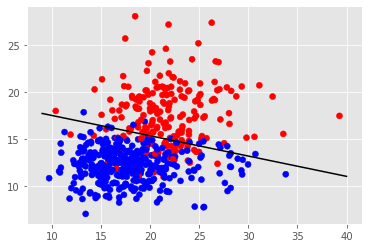

In [43]:
colors = df["diagnosis"].replace({1:"r", 0:"b"}).to_list()

x_axis = np.arange(9, 41)
y_axis =  19.67135103 - 0.21688595 * x_axis  # the boundary equation is one s.t. f(x)=0

fig, ax = plt.subplots()
ax.scatter(fet[:,0], fet[:,1], color = colors)
ax.plot(x_axis, y_axis, color="black")

#### By my gradient descent

In [110]:
reg = LogGradientDescent()
reg.fit(fet, tar, 200000, 0.01)
print(reg.parameter_final)

[[-17.21547626]
 [  0.18339844]
 [  0.92093565]]


Wow wkwk. Didnt expect it to be this quick and easy 8).

adding more iterations

In [107]:
reg = LogGradientDescent()
reg.fit(fet, tar, 1000000, 0.01)
print(reg.parameter_final)

[[-19.82338273]
 [  0.21780569]
 [  1.05574491]]


### Examining the convergence

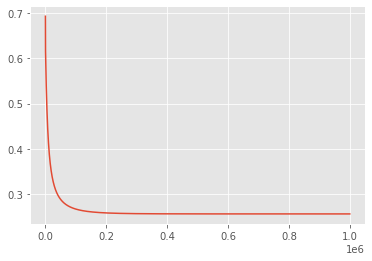

In [108]:
plt.plot(np.arange(1000000), reg.cost_final)
plt.show()

## Finally wkwkwk :p